<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/main/Bandgaps_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing library and imports

In [1]:
# You might need to reinstall the library manually, imports ans pip install:
# !pip install mp_api
!pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 11.9 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=ed8cae2f0010dcd6a247fce428b4531b73d4cc5d39a4fa0fc7480330731e275a
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8aadbbb17dc05f256756d8fd915
Successfully built bibtexparser


In [2]:
# Import
# from mp_api.client import MPRester
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import json
from pymatgen.core.structure import Structure
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
import time

# Example code

In [ ]:
with MPRester("VlQ1oWGAXlhWiKRkPOk5q1cP8dNS6mIu") as mpr:
  #Please edit features you want to filter from inside the search() command. for example:
  example_docs = mpr.materials.summary.search(band_gap=(.001, None), spacegroup_number = 217)


In [3]:
for i in range(len(example_docs)):
    lattice = example_docs[i].structure.lattice
    bandgap = example_docs[i].band_gap
    plt.plot(lattice.gamma, bandgap, 'o')
plt.xlabel('lattice parameter a (Å)')
plt.ylabel('band gap (ev)')
plt.title(f'Band gap vs lattice parameter all materials')
plt.savefig("bandgap all.png")


NameError: name 'example_docs' is not defined

### Download Data from API

This block in the notebook is for bookkeeping purposes only. Don't run this code, instead load the data from the JSON file directly.

In [ ]:
# Put your API key here
API_KEY = "INSERT_API_KEY"

# Configuration
n_zero_bandgap = 50   # number of zero bandgap materials to include in dataset
all_data_fields = ['builder_meta', 'nsites', 'elements', 'nelements',\
                   'composition', 'composition_reduced', 'formula_pretty',\
                   'formula_anonymous', 'chemsys', 'volume', 'density',\
                   'density_atomic', 'symmetry', 'property_name', 'material_id',\
                   'deprecated', 'deprecation_reasons', 'last_updated', 'origins',\
                   'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom',\
                   'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull',\
                   'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to',\
                   'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi',\
                   'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure',\
                   'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering',\
                   'total_magnetization', 'total_magnetization_normalized_vol',\
                   'total_magnetization_normalized_formula_units', 'num_magnetic_sites',\
                   'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus',\
                   'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson',\
                   'e_total', 'e_ionic', 'e_electronic', 'n', 'e_ij_max',\
                   'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy',\
                   'weighted_work_function', 'surface_anisotropy', 'shape_factor',\
                   'has_reconstructed', 'possible_species', 'has_props',\
                   'theoretical', 'database_IDs'] # fields to include in the raw data dump when quering API
fields_to_include = [
    'material_id', 'formula_pretty', 'chemsys', 'elements', 'nelements',
    'nsites', 'volume', 'density', 'density_atomic', 'structure',
    'formation_energy_per_atom', 'energy_above_hull', 'band_gap', 'cbm', 'vbm',
    'is_gap_direct', 'is_metal', 'is_stable', 'efermi',
    'bulk_modulus', 'shear_modulus', 'total_magnetization', 'ordering', 'is_magnetic',
    'composition', 'composition_reduced', 'formula_anonymous', 'symmetry',
    'uncorrected_energy_per_atom', 'energy_per_atom', 'equilibrium_reaction_energy_per_atom',
    'decomposes_to', 'bandstructure', 'dos_energy_up', 'dos_energy_down',
    'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units',
    'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species',
    'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',
    'n', 'e_ij_max', 'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy',
    'weighted_work_function', 'surface_anisotropy', 'shape_factor', 'has_reconstructed',
    'possible_species', 'theoretical'
]

In [ ]:
# Create raw dataset from API
materials_data = []

with MPRester(API_KEY) as mpr:
    # Query materials with non-zero band gap
    nonzero_docs = mpr.materials.summary.search(
        band_gap=(0.001, None),
        fields=fields_to_include,
        num_chunks=None,  # fetch all materials
        chunk_size=1000
    )
    print(f"Fetched {len(nonzero_docs)} materials with non-zero band gap.")

    # Query 50 materials with zero band gap
    zero_docs = mpr.materials.summary.search(
        band_gap=(0.0, 0.0),
        fields=fields_to_include,
        num_chunks=1,
        chunk_size=1000
    )
    print(f"Fetched {len(zero_docs)} materials with zero band gap.")

    # Combine both lists
    all_docs = list(nonzero_docs) + list(zero_docs)

    # Dynamically build dicts from specified fields
    for doc in all_docs:
        d = {}
        for field in fields_to_include:
            value = getattr(doc, field)
            if hasattr(value, "as_dict"):
                d[field] = value.as_dict()  # serialize Structure
            else:
                d[field] = value
        materials_data.append(d)

### Store Data in a JSON

In [ ]:
def clean_entry(entry):
    out = {}
    for k, v in entry.items():
        if isinstance(v, Element):
            out[k] = str(v)
        elif isinstance(v, list) and all(isinstance(i, Element) for i in v):
            out[k] = [str(e) for e in v]
        elif isinstance(v, Composition):
            out[k] = v.as_dict()
        elif hasattr(v, 'as_dict'):
            out[k] = v.as_dict()
        elif isinstance(v, (int, float, str, bool)) or v is None:
            out[k] = v
        elif isinstance(v, list):
            out[k] = [clean_entry(e) if isinstance(e, dict) else e for e in v]
        elif isinstance(v, dict):
            out[k] = clean_entry(v)
        else:
            # Skip unsupported objects
            continue
    return out

In [ ]:
# Cleaned data
cleaned_data = [clean_entry(m) for m in materials_data]
for entry in cleaned_data:
    entry.pop("decomposes_to", None)

In [ ]:
# Save to JSON file
with open("materials_data.json", "w") as f:
    json.dump(cleaned_data, f)

print(f"Saved {len(cleaned_data)} materials to materials_data.json")

# Data categorization and correlation

### Load data from JSON

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the JSON data
with open("/content/drive/MyDrive/Project Documents ML-CMT/materials_data.json") as f:
    materials_data = json.load(f)

In [6]:
def prepare_all_elemental_data(list_elements):
  def aggregation(array):
    return np.array([np.sum(array), np.mean(array), np.std(array), np.min(array), np.max(array)])

  en_data = np.zeros(len(list_elements))
  ie_data = np.zeros(len(list_elements))
  am_data = np.zeros(len(list_elements))
  vdw_data = np.zeros(len(list_elements))
  molar_volume_data = np.zeros(len(list_elements))
  electron_affinity_data = np.zeros(len(list_elements))
  electronegativity_data = np.zeros(len(list_elements))
  atomic_radius_data = np.zeros(len(list_elements))
  boiling_point_data = np.zeros(len(list_elements))

  for i,element in enumerate(list_elements):
    el = Element(element)
    en_data[i] = el.X
    ie_data[i] = el.ionization_energy
    am_data[i] = el.atomic_mass
    vdw_data[i] = el.van_der_waals_radius
    molar_volume_data[i] = el.molar_volume
    electron_affinity_data[i] = el.electron_affinity
    electronegativity_data[i] = el.X
    atomic_radius_data[i] = el.atomic_radius
    boiling_point_data[i] = el.boiling_point

  return aggregation(en_data), aggregation(ie_data), aggregation(am_data), aggregation(vdw_data), aggregation(molar_volume_data), aggregation(electron_affinity_data), aggregation(electronegativity_data), aggregation(atomic_radius_data), aggregation(boiling_point_data)


In [7]:
prepare_all_elemental_data(["Li", "Na", "K"])

(array([2.73      , 0.91      , 0.06683313, 0.82      , 0.98      ]),
 array([14.87145569,  4.9571519 ,  0.44795814,  4.34066373,  5.391715  ]),
 array([69.02906928, 23.00968976, 13.12817031,  6.941     , 39.0983    ]),
 array([6.84      , 2.28      , 0.37973675, 1.82      , 2.75      ]),
 array([82.74      , 27.58      , 13.70551227, 13.02      , 45.94      ]),
 array([1.6674346 , 0.55581153, 0.04792317, 0.50145913, 0.61804922]),
 array([2.73      , 0.91      , 0.06683313, 0.82      , 0.98      ]),
 array([5.45      , 1.81666667, 0.30641294, 1.45      , 2.2       ]),
 array([3803.        , 1267.66666667,  250.76460853, 1032.        ,
        1615.        ]))

In [8]:
el = Element("Li")
el

Element Li

### Build a tabular (processed) dataset

In [10]:
start = time.time()

# Build tabular dataset
records = []
for m in materials_data:
    struct = Structure.from_dict(m["structure"])
    elements = list(set(struct.species))
    en_data, ie_data, am_data, vdw_data, molar_volume_data, electron_affinity_data, electronegativity_data, atomic_radius_data, boiling_point_data = prepare_all_elemental_data(elements)

    # electronegativity
    en_values_weigthed = [Element(el).X for el in elements]

    #ie
    ie_values_weighted = [Element(el).ionization_energy for el in elements]

    #am
    am_values_weighted = [Element(el).atomic_mass for el in elements]

    #vdw
    vdw_values_weighted = [Element(el).van_der_waals_radius for el in elements]

    #molar
    molar_volume_values_weighted = [Element(el).molar_volume for el in elements]

    #electron affinity
    electron_affinity_values_weighted = [Element(el).electron_affinity for el in elements]


    record = {
        "material_id": m["material_id"],
        "band_gap": m["band_gap"],
        "formula": m["formula_pretty"],
        "density": m["density"],
        "volume": m["volume"],
        "a": struct.lattice.a,
        "b": struct.lattice.b,
        "c": struct.lattice.c,
        "alpha": struct.lattice.alpha,
        "beta": struct.lattice.beta,
        "gamma": struct.lattice.gamma,
        "n_atoms": m["nsites"],
        "mean_distance": 0.0 if m["nsites"] == 1 else np.mean(struct.distance_matrix[0][1:]),
        "max_distance": np.max(struct.distance_matrix[0]),
        "min_distance": np.min(struct.distance_matrix[0]) if m["nsites"] == 1 else np.sort(struct.distance_matrix[0])[1], # taking second smallest distance, because distance to self is always 0
        "std_distance": 0.0 if m["nsites"] == 1 else np.std(struct.distance_matrix[0][1:]),
        "spacegroup_number " : struct.get_space_group_info()[1],

        #"electronegativities": en_data,
        "avg_en_weighted": np.mean(en_values_weigthed),
        "en_range_weighted": np.max(en_values_weigthed) - np.min(en_values_weigthed),
        "std_en_weighted": np.std(en_values_weigthed),

        "avg_ie_weighted": np.mean(ie_values_weighted),
        "ie_range_weighted": np.max(ie_values_weighted) - np.min(ie_values_weighted),
        "std_ie_weighted": np.std(ie_values_weighted),

        "avg_am_weighted": np.mean(am_values_weighted),
        "am_range_weighted": np.max(am_values_weighted) - np.min(am_values_weighted),
        "std_am_weighted": np.std(am_values_weighted),

        "avg_vdw_weighted": np.mean(vdw_values_weighted),
        "vdw_range_weighted": np.max(vdw_values_weighted) - np.min(vdw_values_weighted),
        "std_vdw_weighted": np.std(vdw_values_weighted),

        "avg_molar_volume_weighted": np.mean(molar_volume_values_weighted),
        "molar_volume_range_weighted": np.max(molar_volume_values_weighted) - np.min(molar_volume_values_weighted),
        "std_molar_volume_weighted": np.std(molar_volume_values_weighted),

        "avg_electron_affinity_weighted": np.mean(electron_affinity_values_weighted),
        "electron_affinity_range_weighted": np.max(electron_affinity_values_weighted) - np.min(electron_affinity_values_weighted),
        "std_electron_affinity_weighted": np.std(electron_affinity_values_weighted),

        #non weighted

        "avg_en": np.mean(en_data),
        "en_range": np.max(en_data) - np.min(en_data),
        "std_en": np.std(en_data),
        "max_en ": np.max(en_data),
        "min_en": np.min(en_data),

        "avg_ie": np.mean(ie_data),
        "ie_range": np.max(ie_data) - np.min(ie_data),
        "std_ie": np.std(ie_data),
        "max_ie ": np.max(ie_data),
        "min_ie": np.min(ie_data),

        "avg_am": np.mean(am_data),
        "am_range": np.max(am_data) - np.min(am_data),
        "std_am": np.std(am_data),
        "max_am ": np.max(am_data),
        "min_am": np.min(am_data),

        "avg_vdw": np.mean(vdw_data),
        "vdw_range": np.max(vdw_data) - np.min(vdw_data),
        "std_vdw": np.std(vdw_data),
        "max_vdw ": np.max(vdw_data),
        "min_vdw": np.min(vdw_data),

        "avg_molar_volume": np.mean(molar_volume_data),
        "molar_volume_range": np.max(molar_volume_data) - np.min(molar_volume_data),
        "std_molar_volume": np.std(molar_volume_data),
        "max_molar_volume ": np.max(molar_volume_data),
        "min_molar_volume": np.min(molar_volume_data),

        "avg_electron_affinity": np.mean(electron_affinity_data),
        "electron_affinity_range": np.max(electron_affinity_data) - np.min(electron_affinity_data),
        "std_electron_affinity": np.std(electron_affinity_data),
        "max_electron_affinity ": np.max(electron_affinity_data),
        "min_electron_affinity": np.min(electron_affinity_data),

        "avg_electronegativity": np.mean(electronegativity_data),
        "electronegativity_range": np.max(electronegativity_data) - np.min(electronegativity_data),
        "std_electronegativity": np.std(electronegativity_data),
        "max_electronegativity ": np.max(electronegativity_data),
        "min_electronegativity": np.min(electronegativity_data),

        "avg_atomic_radius": np.mean(atomic_radius_data),
        "atomic_radius_range": np.max(atomic_radius_data) - np.min(atomic_radius_data),
        "std_atomic_radius": np.std(atomic_radius_data),
        "max_atomic_radius ": np.max(atomic_radius_data),
        "min_atomic_radius": np.min(atomic_radius_data),

        "avg_boiling_point": np.mean(boiling_point_data),
        "boiling_point_range": np.max(boiling_point_data) - np.min(boiling_point_data),
        "std_boiling_point": np.std(boiling_point_data),
        "max_boiling_point ": np.max(boiling_point_data),
        "min_boiling_point": np.min(boiling_point_data),

        "number_of_elements": len(elements),


    }
    records.append(record)

end = time.time()

print(f"Execution time: {end - start:.4f} seconds")

# df = pd.DataFrame(records)
# df.to_csv("bandgap_dataset.csv", index=False)

# print(f"Saved tabular dataset to bandgap_dataset.csv with shape {df.shape}")

<ipython-input-6-f9a8b0c82c52>:25: UserWarning: No data available for boiling_point for Pa
  boiling_point_data[i] = el.boiling_point
<ipython-input-6-f9a8b0c82c52>:17: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_data[i] = el.X
<ipython-input-6-f9a8b0c82c52>:23: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  electronegativity_data[i] = el.X
<ipython-input-10-e542666ebd32>:11: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_values_weigthed = [Element(el).X for el in elements]
<ipython-input-6-f9a8b0c82c52>:17: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is ma

Execution time: 826.0510 seconds


In [11]:
df = pd.DataFrame(records)
df.to_csv("bandgap_dataset_premium.csv", index=False)
print(f"Saved tabular dataset to bandgap_dataset.csv with shape {df.shape}")

Saved tabular dataset to bandgap_dataset.csv with shape (82998, 81)


In [21]:
dff.columns

Index(['material_id', 'band_gap', 'formula', 'density', 'volume', 'a', 'b',
       'c', 'alpha', 'beta', 'gamma', 'n_atoms', 'mean_distance',
       'max_distance', 'min_distance', 'std_distance', 'spacegroup_number ',
       'avg_en_weighted', 'en_range_weighted', 'std_en_weighted',
       'avg_ie_weighted', 'ie_range_weighted', 'std_ie_weighted',
       'avg_am_weighted', 'am_range_weighted', 'std_am_weighted',
       'avg_vdw_weighted', 'vdw_range_weighted', 'std_vdw_weighted',
       'avg_molar_volume_weighted', 'molar_volume_range_weighted',
       'std_molar_volume_weighted', 'avg_electron_affinity_weighted',
       'electron_affinity_range_weighted', 'std_electron_affinity_weighted',
       'avg_en', 'en_range', 'std_en', 'max_en ', 'min_en', 'avg_ie',
       'ie_range', 'std_ie', 'max_ie ', 'min_ie', 'avg_am', 'am_range',
       'std_am', 'max_am ', 'min_am', 'avg_vdw', 'vdw_range', 'std_vdw',
       'max_vdw ', 'min_vdw', 'avg_molar_volume', 'molar_volume_range',
       'std_m

In [23]:
dff = df.copy()
dff = dff.drop(columns='material_id')
dff = dff.drop(columns='formula')


In [24]:
dff.corr(method= 'spearman')

band_gap   density    volume         a         b  \
band_gap             1.000000 -0.193944  0.111489  0.080554  0.051380   
density             -0.193944  1.000000 -0.320883 -0.255914 -0.232696   
volume               0.111489 -0.320883  1.000000  0.643818  0.724146   
a                    0.080554 -0.255914  0.643818  1.000000  0.553967   
b                    0.051380 -0.232696  0.724146  0.553967  1.000000   
...                       ...       ...       ...       ...       ...   
boiling_point_range -0.064214  0.139797  0.101215  0.094689  0.057220   
std_boiling_point   -0.060595  0.130788  0.110541  0.101725  0.063834   
max_boiling_point   -0.084497  0.153636  0.105067  0.099251  0.063539   
min_boiling_point   -0.255497  0.307896  0.022789  0.029908  0.041114   
number_of_elements   0.128640 -0.203463  0.245336  0.199948  0.152606   

                            c     alpha      beta     gamma   n_atoms  ...  \
band_gap             0.054071 -0.049213 -0.015350  0.050550  0.190077  ...   
density             -0.191722 -0.008883 -0.050909 -0.037667 -0.301494  ...   
volume               0.757380  0.086244  0.131446  0.194119  0.852190  ...   
a                    0.211336 -0.077239  0.009682  0.009717  0.513148  ...   
b                    0.379847  0.093432  0.061700  0.003873  0.590999  ...   
...                       ...       ...       ...       ...       ...  ...   
boiling_point_range  0.098137  0.018176 -0.002143  0.075817  0.179340  ...   
std_boiling_point    0.105231  0.017681 -0.002094  0.077458  0.183572  ...   
max_boiling_point    0.102956  0.021712 -0.001664  0.073285  0.157637  ...   
min_boiling_point    0.055527  0.021443 -0.027084 -0.009708 -0.225726  ...   
number_of_elements   0.173690 -0.036326 -0.021108  0.087620  0.385142  ...   

                     atomic_radius_range  std_atomic_radius  \
band_gap                        0.020192           0.044881   
density                         0.076513           0.065041   
volume                          0.199340           0.195471   
a                               0.209080           0.204411   
b                               0.153112           0.147281   
...                                  ...                ...   
boiling_point_range             0.606262           0.614529   
std_boiling_point               0.608427           0.616240   
max_boiling_point               0.612054           0.614440   
min_boiling_point               0.207640           0.150641   
number_of_elements              0.774305           0.806248   

                     max_atomic_radius   min_atomic_radius  avg_boiling_point  \
band_gap                       0.035110           0.126076          -0.091008   
density                        0.094229           0.289646           0.174211   
volume                         0.191137          -0.073621           0.088309   
a                              0.204467          -0.005411           0.082236   
b                              0.147835          -0.035453           0.050323   
...                                 ...                ...                ...   
boiling_point_range            0.596818           0.081594           0.947452   
std_boiling_point              0.598155           0.071305           0.954014   
max_boiling_point              0.600507           0.064014           0.955978   
min_boiling_point              0.202408           0.030128           0.186332   
number_of_elements             0.758683           0.014734           0.398058   

                     boiling_point_range  std_boiling_point  \
band_gap                       -0.064214          -0.060595   
density                         0.139797           0.130788   
volume                          0.101215           0.110541   
a                               0.094689           0.101725   
b                               0.057220           0.063834   
...                                  ...                ...   
boiling_point_range             1.00

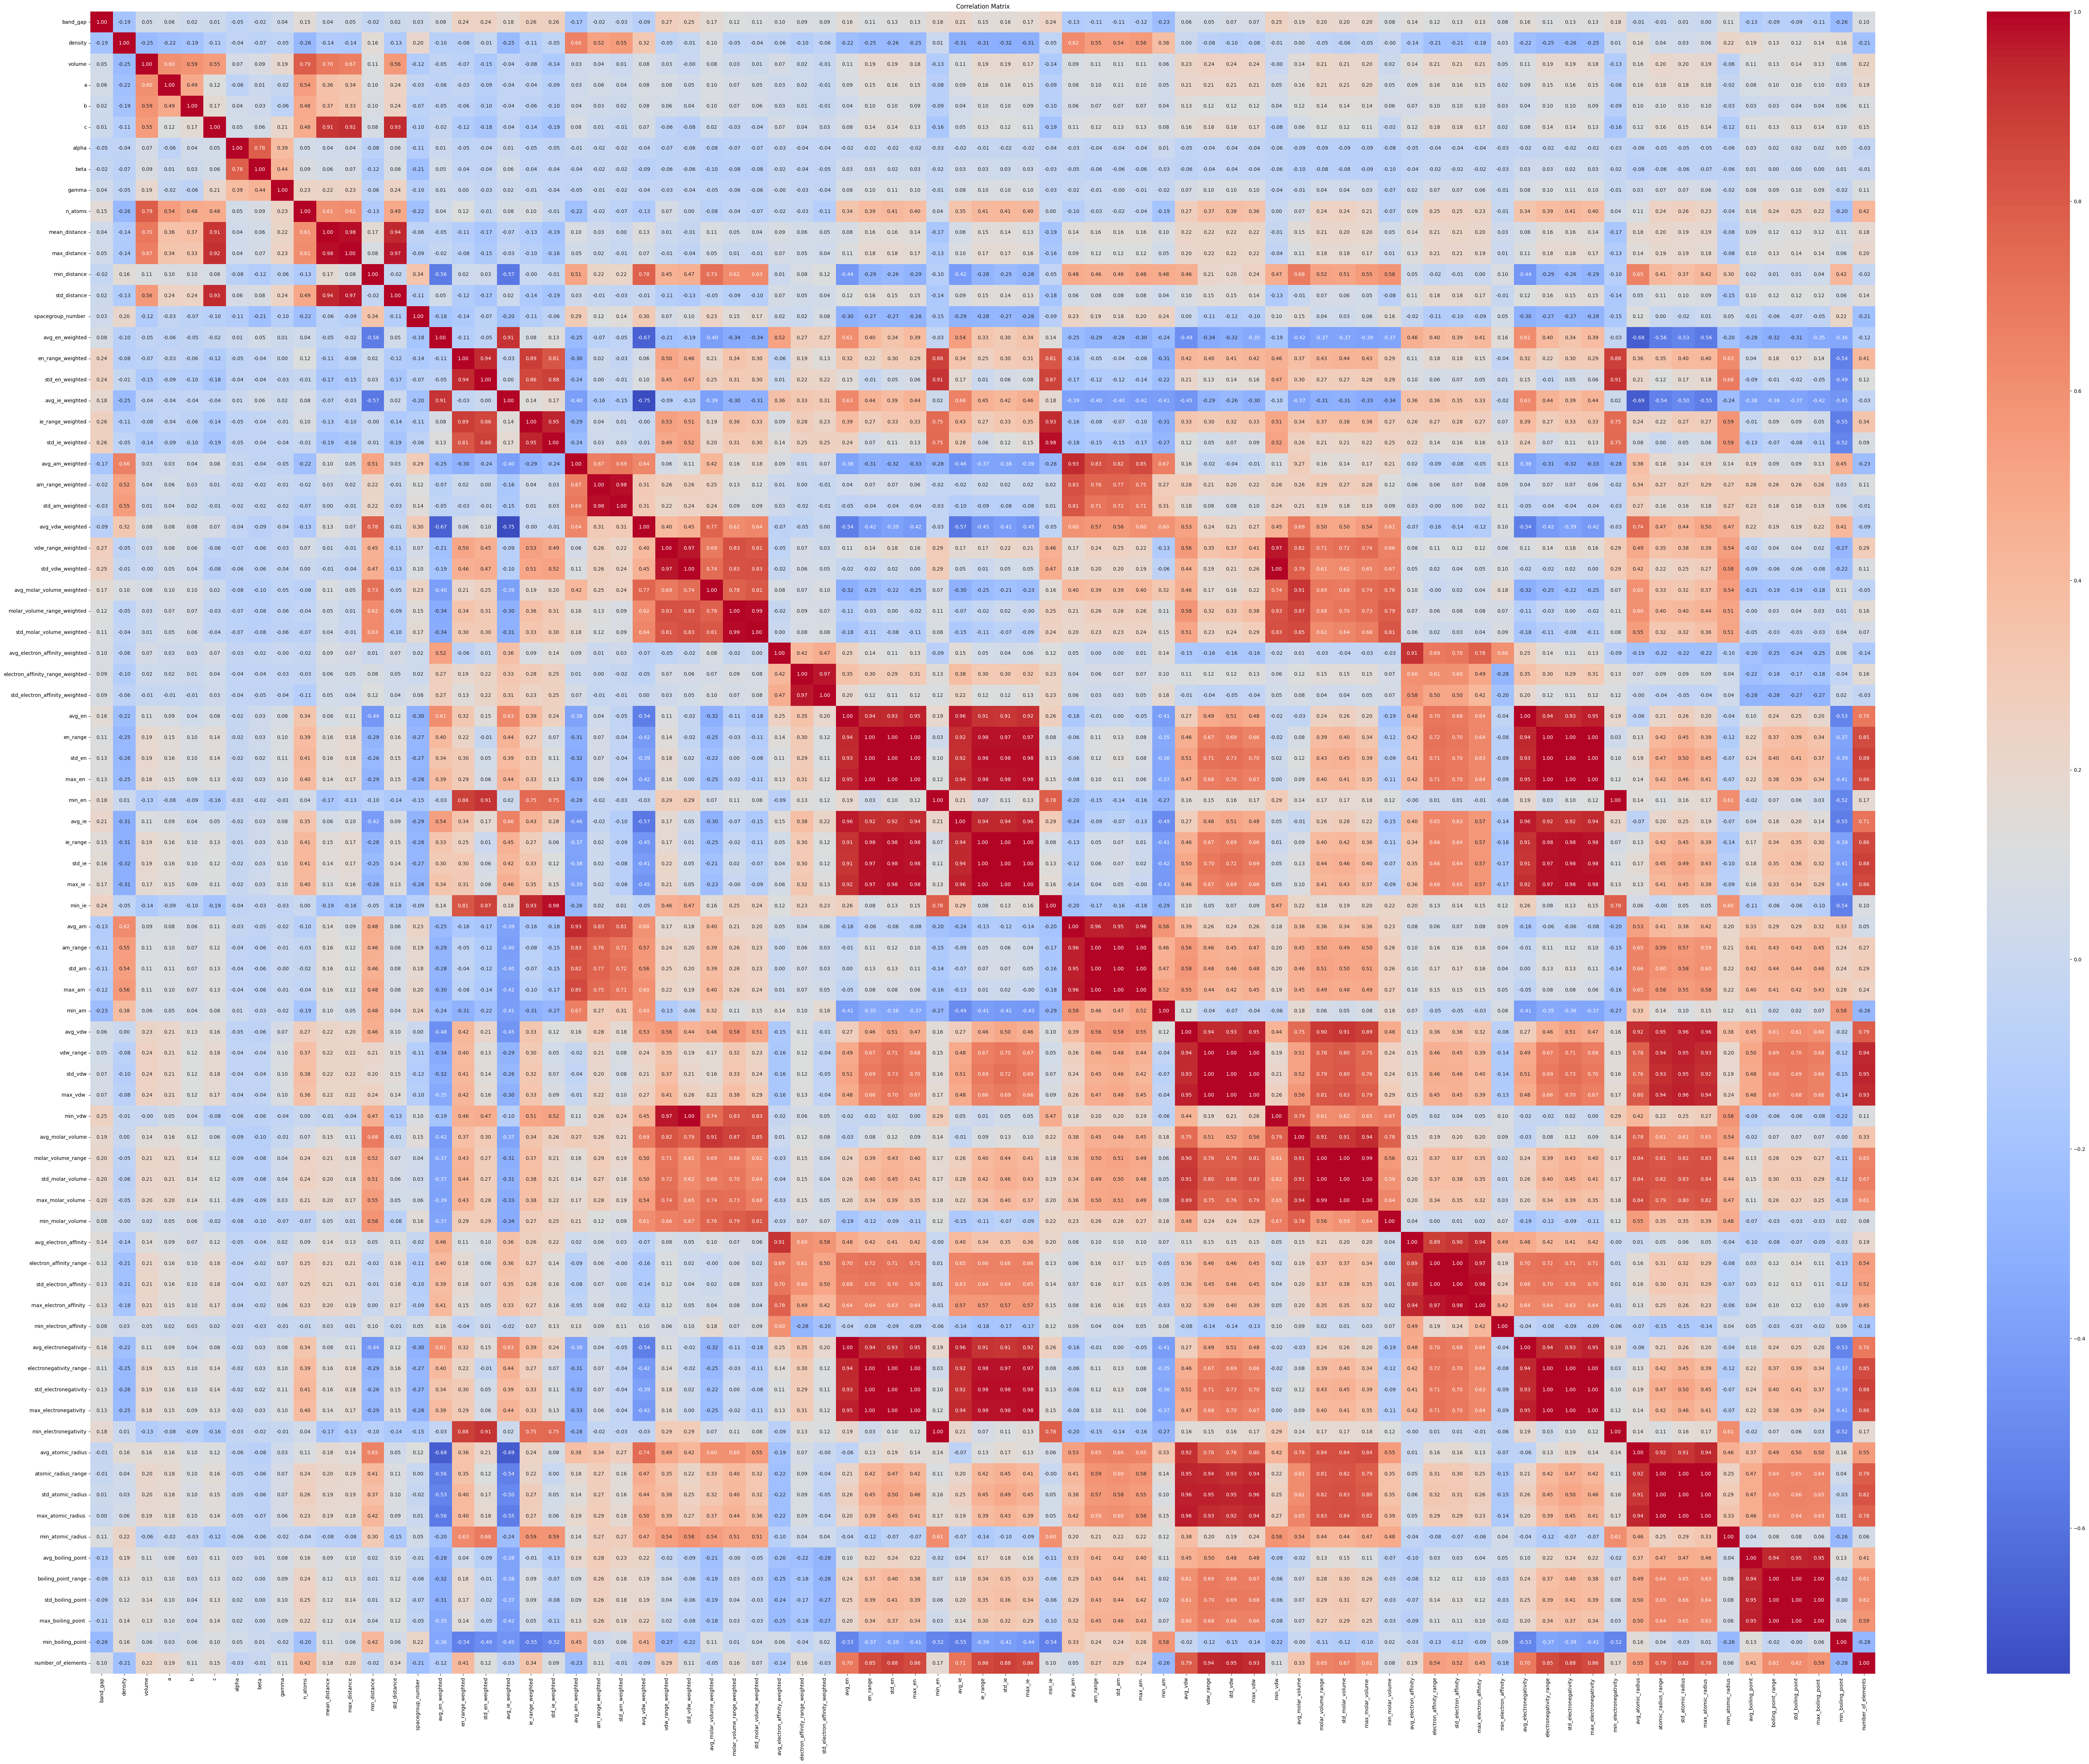

In [27]:
plt.figure(figsize=(80, 60))
sns.heatmap(dff.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig('corrss.png')


In [ ]:
victor_feat = ["avg_en", "en_range", "max_en ",  "min_en", "std_en"]

In [ ]:
niko_feat = ["vbm", "cbm", "bulk_modulus", "shear_modulus"]

In [ ]:
elements = set(struct.species)

In [ ]:
m

{'material_id': 'mp-1228947',
 'formula_pretty': 'AlAg4',
 'chemsys': 'Ag-Al',
 'elements': ['Ag', 'Al'],
 'nelements': 2,
 'nsites': 5,
 'volume': 87.7937743123103,
 'density': 8.671245147627953,
 'density_atomic': 17.55875486246206,
 'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[11.712989, -1.472910999999999, 0.0],
    [11.712989, 1.472910999999999, 0.0],
    [11.52777, 0.0, 2.5444240000000002]],
   'a': 11.805235200030621,
   'b': 11.805235200030621,
   'c': 11.805235053342903,
   'alpha': 14.334671057232613,
   'beta': 14.334671057232613,
   'gamma': 14.33467169172179,
   'volume': 87.79377431231025},
  'sites': [{'species': [{'element': 'Al', 'occu': 1}],
    'abc': [0.0, 0.0, 0.0],
    'xyz': [0.0, 0.0, 0.0],
    'label': 'Al',
    'properties': {'magmom': 0.0}},
   {'species': [{'element': 'Ag', 'occu': 1}],
    'abc': [0.603645, 0.603645, 0.603645],
    'xyz': [21.09965521146, 0.0, 1.53592882548],
    'labe

In [ ]:
df = pd.DataFrame(records)

# make a copy of dataframe
df_initial = df.copy()

#### Data Quality Checks

##### Dataset Info

In [ ]:
print(df.shape)
df.info()
df.describe()

NameError: name 'df' is not defined

Change the shear and bulk values so that they are floats

In [ ]:
df = df_initial.copy()

In [ ]:
# Step 1: Keep relevant columns and drop rows with missing shear modulus
shear_df = df[["material_id", "shear_modulus"]].dropna()

# Step 2: Expand the dictionary in 'shear_modulus' into separate columns
shear_components = shear_df["shear_modulus"].apply(pd.Series)

# Step 3: Rename the columns
shear_components.rename(columns={
    "voigt": "s_voigt",
    "reuss": "s_reuss",
    "vrh": "s_vrh"
}, inplace=True)

# Step 4: Combine with 'material_id'
shear_df_final = pd.concat([shear_df["material_id"], shear_components], axis=1)

# do the same for bulk modulus
bulk_df = df[["material_id", "bulk_modulus"]].dropna()

# Step 2: Expand the dictionary in 'bulk_modulus' into separate columns
bulk_components = bulk_df["bulk_modulus"].apply(pd.Series)

# Step 3: Rename the columns
bulk_components.rename(columns={
    "voigt": "b_voigt",
    "reuss": "b_reuss",
    "vrh": "b_vrh"
}, inplace=True)

# Step 4: Combine with 'material_id'
bulk_df_final = pd.concat([bulk_df["material_id"], bulk_components], axis=1)

# merge the two dataframes to the original dataframe
df = df.merge(shear_df_final, on="material_id", how="left")
df = df.merge(bulk_df_final, on="material_id", how="left")

# drop the original columns
df = df.drop(columns=["shear_modulus", "bulk_modulus"])

In [ ]:
print(df.shape)
df.info()
df.describe()

(82998, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82998 entries, 0 to 82997
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   material_id  82998 non-null  object 
 1   band_gap     82998 non-null  float64
 2   formula      82998 non-null  object 
 3   density      82998 non-null  float64
 4   volume       82998 non-null  float64
 5   a            82998 non-null  float64
 6   b            82998 non-null  float64
 7   c            82998 non-null  float64
 8   alpha        82998 non-null  float64
 9   beta         82998 non-null  float64
 10  gamma        82998 non-null  float64
 11  n_atoms      82998 non-null  int64  
 12  avg_en       82989 non-null  float64
 13  en_range     82998 non-null  float64
 14  max_en       82989 non-null  float64
 15  min_en       82989 non-null  float64
 16  std_en       82989 non-null  float64
 17  avg_ie       82998 non-null  float64
 18  ie_range     82998 non-null  float

band_gap       density        volume             a             b  \
count  82998.000000  82998.000000  82998.000000  82998.000000  82998.000000   
mean       1.984421      4.061805    668.913474      7.669236      8.044636   
std        1.560981      1.717274    693.624420      3.177138      2.800604   
min        0.000000      0.020144     11.286588      2.363000      2.363000   
25%        0.653400      2.913572    254.760639      5.553544      6.015389   
50%        1.728450      3.773981    452.574159      7.012094      7.718989   
75%        3.013225      4.954535    841.664286      8.965331      9.328646   
max       17.891400     18.889325  20090.906408     46.210701     61.125585   

                  c         alpha          beta         gamma       n_atoms  \
count  82998.000000  82998.000000  82998.000000  82998.000000  82998.000000   
mean      11.280915     86.028830     88.065828     89.700249     42.406058   
std        6.822619     17.420383     15.977789     22.074143     40.632079   
min        2.395898      3.664087      5.397478      5.397478      1.000000   
25%        7.389807     77.756958     88.952439     86.976837     16.000000   
50%        9.712402     90.000000     90.000000     90.000000     29.000000   
75%       13.157808     90.000000     90.000000     99.717832     54.000000   
max      211.425839    169.783994    169.783994    168.048246    444.000000   

       ...       min_vdw       std_vdw           vbm           cbm  \
count  ...  82998.000000  82998.000000  82122.000000  82122.000000   
mean   ...      1.528267      0.290510      1.585835      3.591381   
std    ...      0.203977      0.132925      2.238984      2.214685   
min    ...      1.100000      0.000000    -14.222600     -7.360600   
25%    ...      1.520000      0.207338      0.166850      2.368150   
50%    ...      1.520000      0.267822      1.629350      3.660450   
75%    ...      1.520000      0.348872      2.952475      4.974900   
max    ...      3.430000      1.165000     12.376100     14.341400   

            s_voigt      s_reuss         s_vrh       b_voigt       b_reuss  \
count  3.906000e+03  3906.000000  3.906000e+03  3.906000e+03   3906.000000   
mean  -1.168219e+09    34.525918 -5.841097e+08  1.186600e+04     55.945211   
std    7.301140e+10   100.558324  3.650570e+10  6.992562e+05   1123.636490   
min   -4.563066e+12 -4410.673000 -2.281533e+12 -2.256240e+06 -69299.120000   
25%    1.337850e+01     8.292500  1.105525e+01  2.612075e+01     21.147250   
50%    2.904100e+01    22.793000  2.573100e+01  5.554650e+01     50.648500   
75%    5.618525e+01    49.121500  5.245875e+01  1.107737e+02    104.806000   
max    3.178049e+06  1374.466000  1.589075e+06  4.331111e+07   8436.677000   

              b_vrh  
count  3.906000e+03  
mean   5.960971e+03  
std    3.496958e+05  
min   -1.128047e+06  
25%    2.343600e+01  
50%    5.323400e+01  
75%    1.075623e+02  
max    2.165977e+07  

[8 rows x 37 columns]

##### Missing Data Analysis

In [ ]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])

               Missing Values    Percent
avg_en                      9   0.010844
max_en                      9   0.010844
min_en                      9   0.010844
std_en                      9   0.010844
vbm                       876   1.055447
cbm                       876   1.055447
bulk_modulus            79092  95.293863
shear_modulus           79092  95.293863


##### Duplicate Checks

In [ ]:
# Exact duplicates across all columns
print("Full row duplicates:", df.duplicated().sum())

Full row duplicates: 0


In [ ]:
# Duplicates ignoring material_id
df_no_id = df.drop(columns=["material_id"])
print("Duplicates excluding material_id:", df_no_id.duplicated().sum())

Duplicates excluding material_id: 0


In [ ]:
# Check how many material IDs have the same formula or lattice
df.duplicated(subset=["formula", "a", "b", "c", "alpha", "beta", "gamma"]).sum()

np.int64(76)

##### Uniqueness and Distribution of Identifier

In [ ]:
print("Unique material IDs:", df["material_id"].nunique())

Unique material IDs: 82998


##### Check Physically Invalid Values

In [ ]:
assert (df["band_gap"] >= 0).all(), "Band gap can't be negative"

#### Exploratory Data Analysis (EDA)

##### Feature Distributions and Outlier Detection

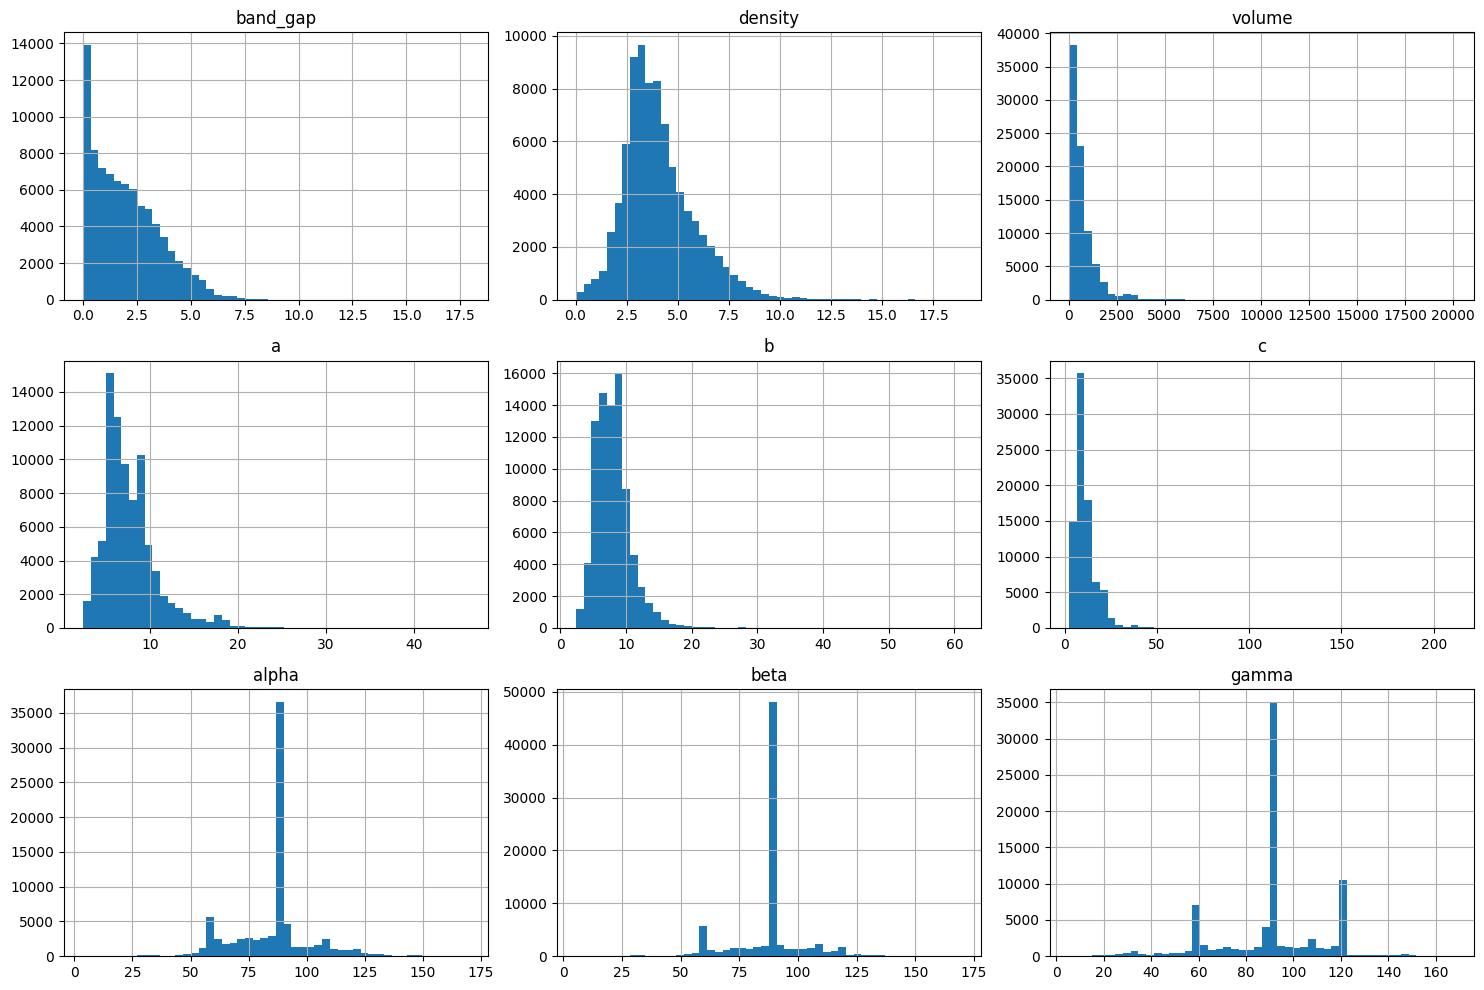

In [ ]:
numeric_features = ["band_gap", "density", "volume", "a", "b", "c", "alpha", "beta", "gamma"]
df[numeric_features].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

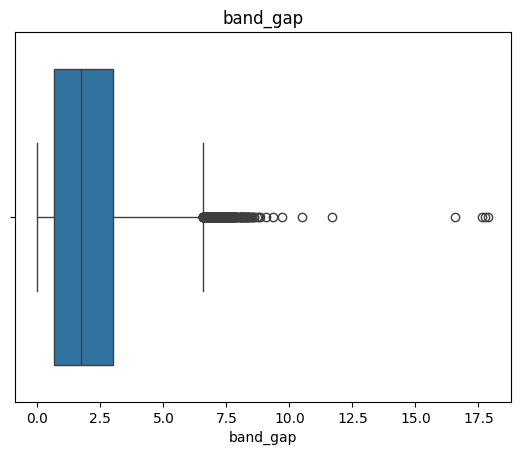

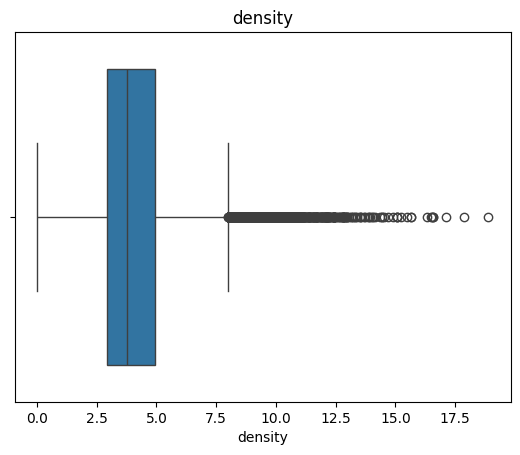

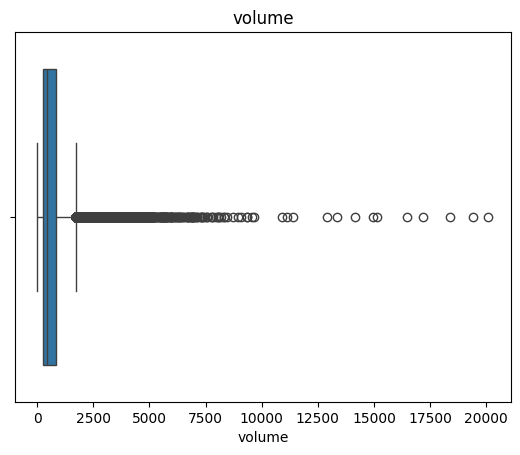

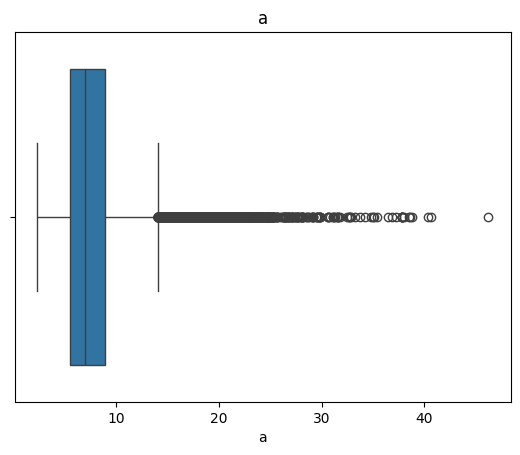

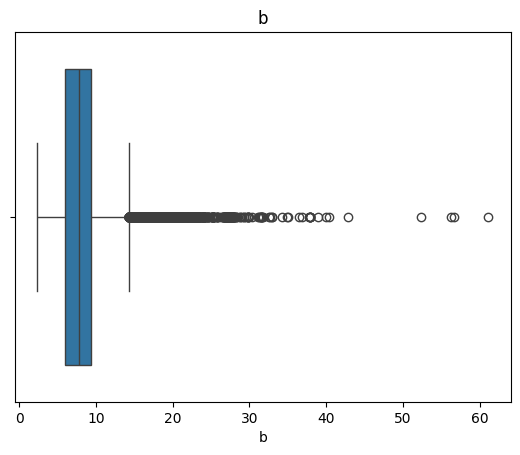

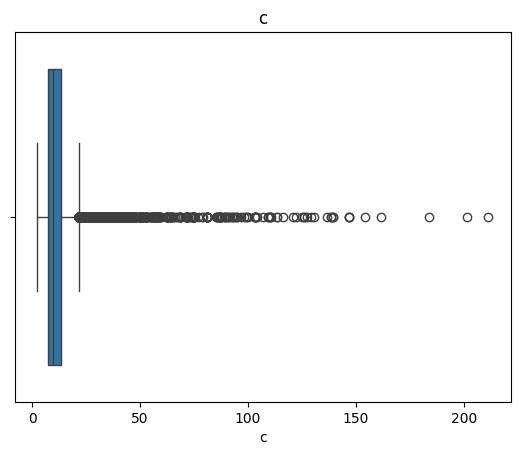

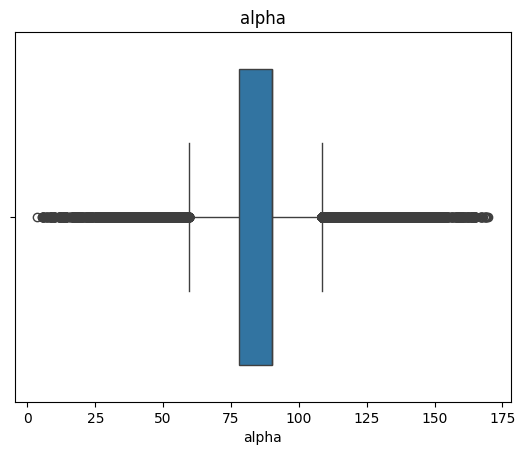

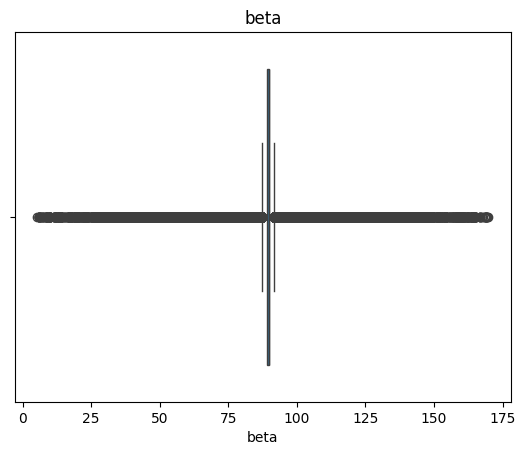

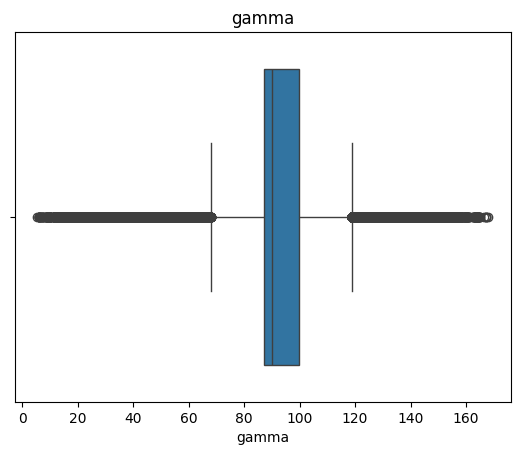

In [ ]:
for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = df[df["band_gap"] <= 1]

sns.histplot(filtered_df["band_gap"], bins=100, kde=True)
plt.title("Band Gap Distribution (0–1 eV)")
plt.xlabel("eV")
plt.ylabel


KeyError: "None of [Index([  3.522599999999999,              2.2962,              3.0275,\n       0.07939999999999901,              4.1024,              0.8071,\n         4.103299999999999,               4.241,              5.0865,\n                    4.4451,\n       ...\n                       0.0,                 0.0,                 0.0,\n                       0.0,                 0.0,                 0.0,\n                       0.0,                 0.0,                 0.0,\n                       0.0],\n      dtype='float64', length=82998)] are in the [columns]"

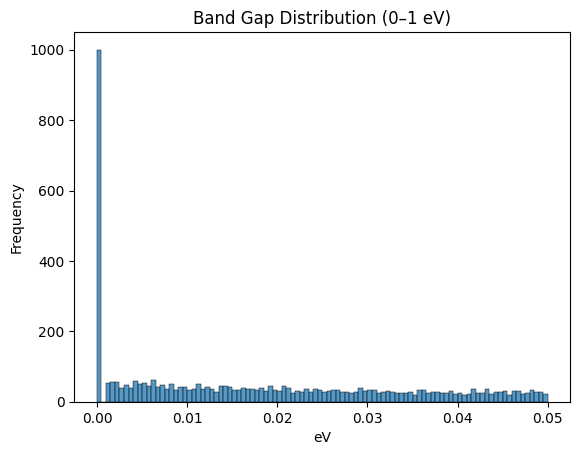

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df2 = df[df["band_gap"] <= .05]

sns.histplot(filtered_df2["band_gap"], bins=100)
plt.title("Band Gap Distribution (0–1 eV)")
plt.xlabel("eV")
plt.ylabel("Frequency")
plt.show()


##### Target (band gap) distribution

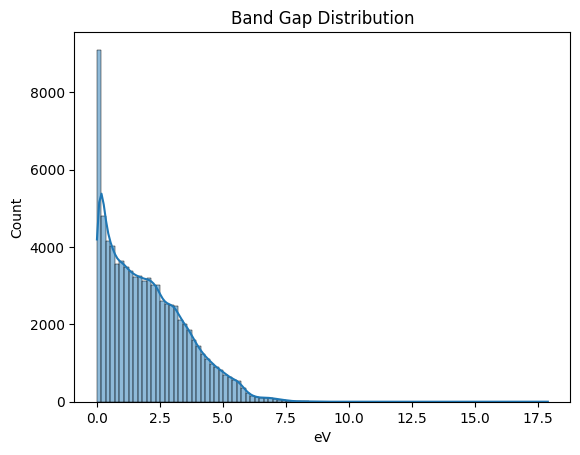

In [ ]:
sns.histplot(df["band_gap"], bins=100, kde=True)
plt.title("Band Gap Distribution")
plt.xlabel("eV")
plt.show()

##### Correlation Matrix

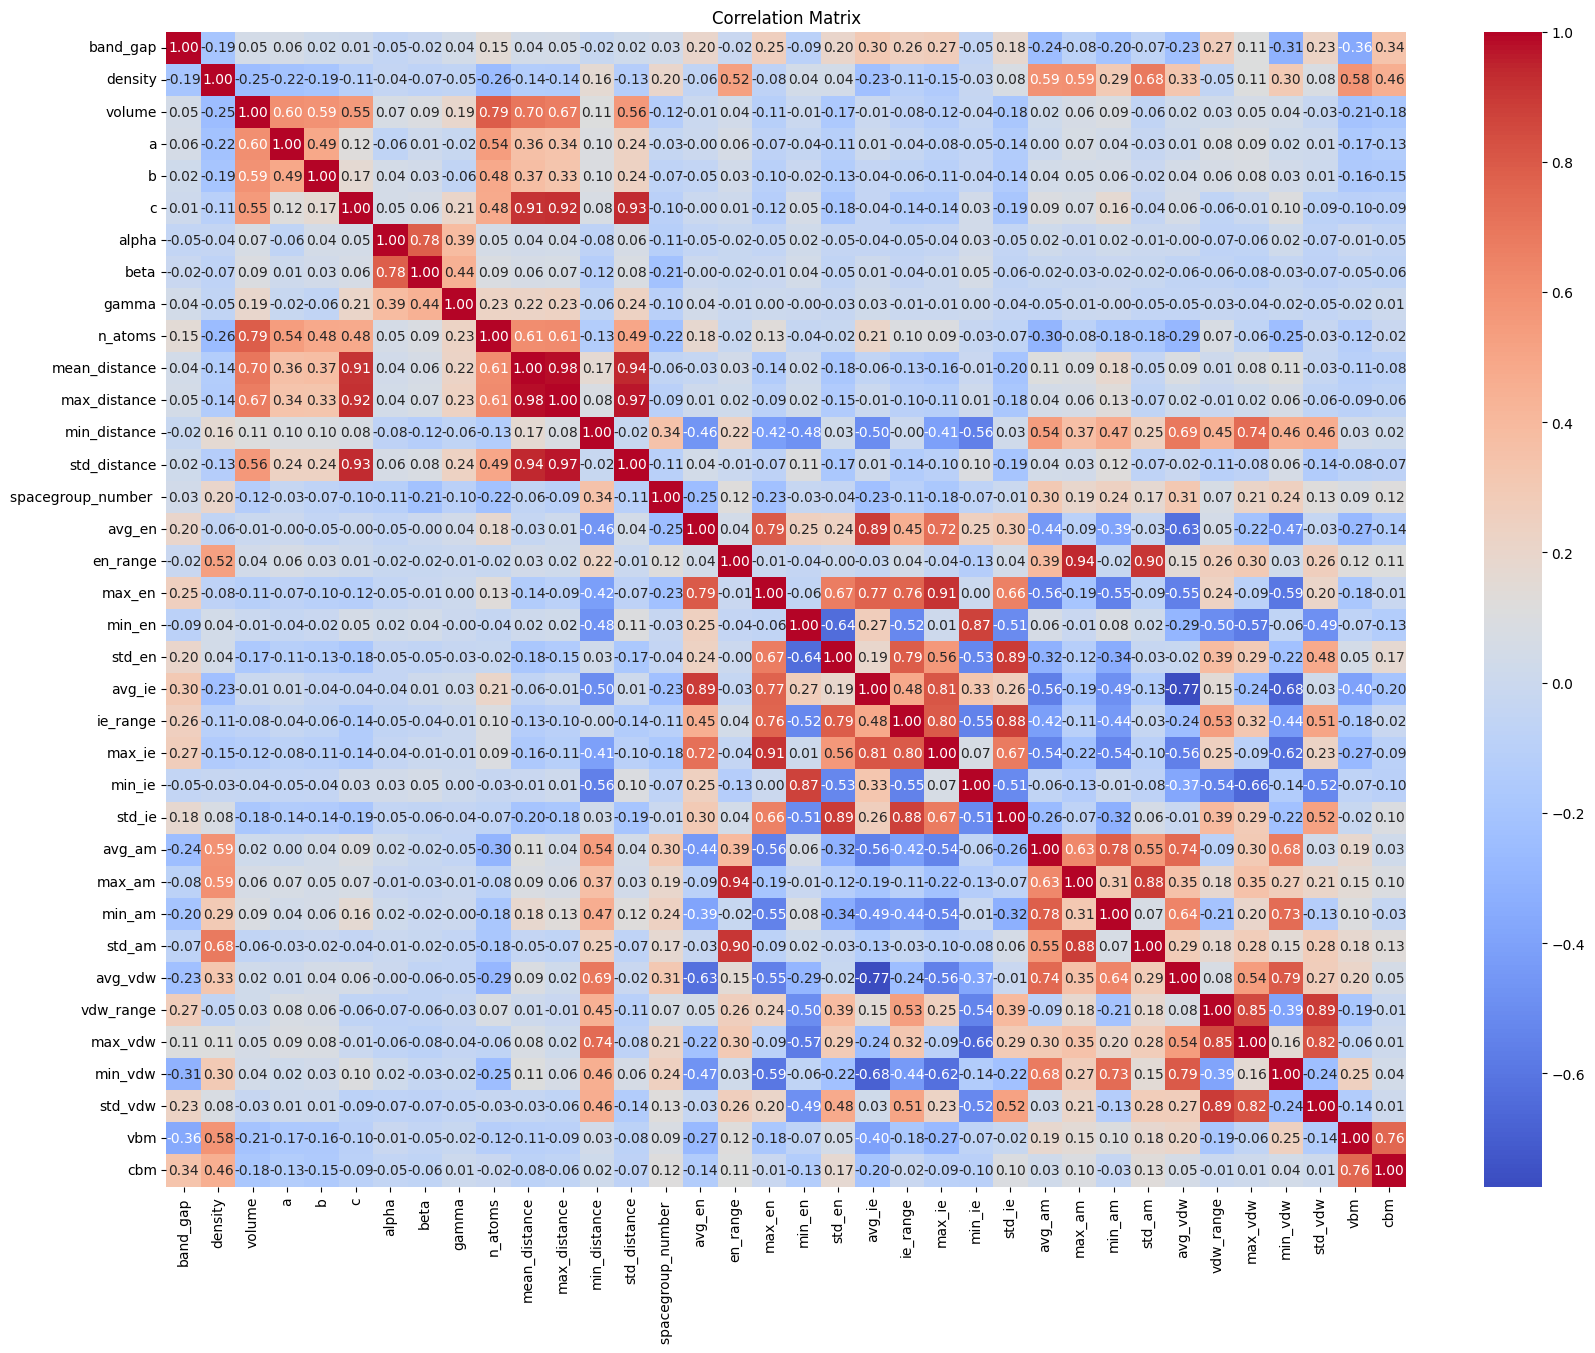

82998

In [ ]:

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
len(df)

In [ ]:
df_filter = df[df['spacegroup_number '] == number]
correlation_matrix = df_filter.corr(numeric_only=True)
first_column = correlation_matrix['band_gap'] # Assuming 'band_gap' is the first column
first_column_abs = np.abs(first_column)
first_column_abs

band_gap              1.000000
density               0.481557
volume                0.135935
a                     0.106723
b                     0.106724
c                     0.106725
alpha                 0.182249
beta                  0.182247
gamma                 0.082445
n_atoms               0.430951
mean_distance         0.093823
max_distance          0.056050
min_distance          0.256858
std_distance          0.140740
spacegroup_number          NaN
avg_en                0.484818
en_range              0.444780
max_en                0.464759
min_en                0.143982
std_en                0.261679
avg_ie                0.561476
ie_range              0.459489
max_ie                0.596967
min_ie                0.095670
std_ie                0.331241
avg_am                0.532079
max_am                0.511509
min_am                0.410938
std_am                0.421283
avg_vdw               0.463852
vdw_range             0.254635
max_vdw               0.048981
min_vdw               0.482804
std_vdw               0.122512
vbm                   0.394560
cbm                   0.344791
Name: band_gap, dtype: float64

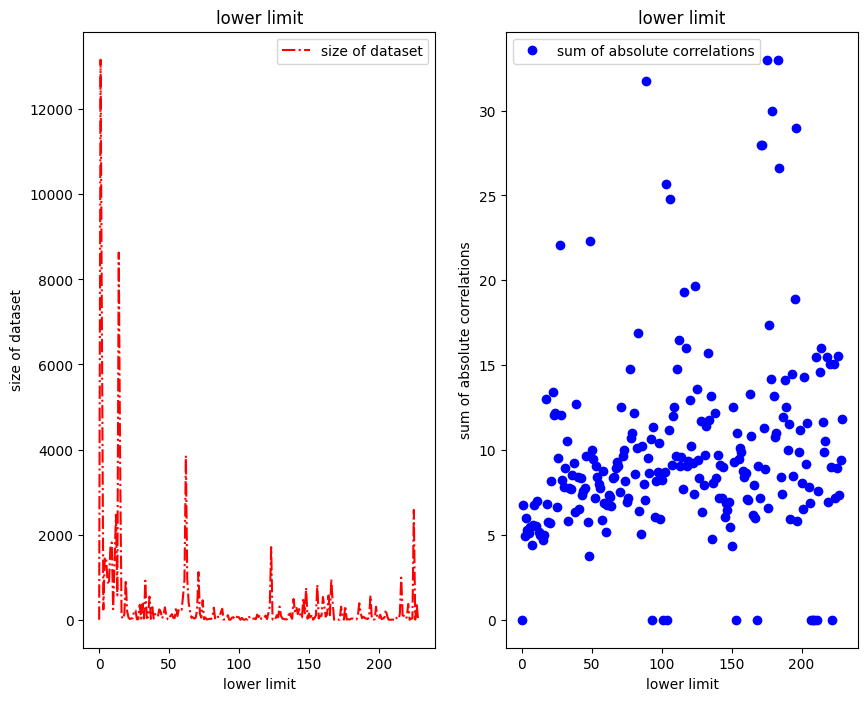

[0, 13164, 6780, 240, 1471, 1415, 905, 831, 1688, 1815, 248, 1393, 2470, 572, 8630, 3693, 83, 19, 128, 934, 200, 50, 17, 31, 36, 214, 219, 7, 15, 351, 26, 371, 25, 919, 41, 60, 544, 20, 296, 28, 134, 77, 75, 242, 191, 31, 107, 292, 97, 14, 5, 91, 130, 46, 38, 290, 86, 259, 256, 234, 558, 935, 3855, 951, 397, 196, 43, 57, 29, 45, 215, 1119, 143, 48, 457, 12, 51, 4, 16, 22, 17, 57, 283, 3, 26, 73, 56, 171, 258, 3, 9, 28, 107, 0, 4, 47, 60, 15, 22, 121, 45, 0, 44, 4, 1, 15, 3, 84, 19, 31, 25, 28, 11, 120, 62, 115, 15, 14, 46, 99, 14, 149, 322, 1707, 5, 35, 16, 107, 54, 309, 93, 28, 16, 11, 7, 27, 192, 83, 21, 489, 197, 302, 132, 251, 48, 54, 507, 150, 751, 25, 146, 11, 121, 1, 40, 103, 823, 30, 88, 91, 535, 319, 71, 123, 571, 108, 956, 395, 0, 21, 8, 2, 2, 307, 71, 2, 324, 5, 14, 2, 23, 28, 27, 2, 3, 96, 386, 152, 36, 71, 38, 28, 15, 57, 569, 8, 2, 12, 305, 34, 22, 117, 14, 26, 53, 234, 79, 0, 0, 0, 3, 0, 60, 30, 13, 133, 990, 103, 87, 19, 64, 370, 0, 23, 29, 2582, 4, 394, 10, 44]
[np.flo

In [ ]:
sum_correlations = []
size_dataset = []
lowerlimits = [0,0.01,0.05, 0.1, 0.5, 0.75, 1, 1.5, 2, 3, 4]
for number in range(0,230):
  df_filter = df[df['spacegroup_number '] == number].corr(numeric_only=True)
  df_filter = df[df['spacegroup_number '] == number]
  correlation_matrix = df_filter.corr(numeric_only=True)
  first_column = correlation_matrix['band_gap'] # Assuming 'band_gap' is the first column
  first_column_abs = np.abs(first_column)
  sum_correlations.append(np.sum(first_column_abs))
  size_dataset.append(len(df_filter))

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(range(0,230), size_dataset, '-.r')
plt.xlabel("lower limit")
plt.ylabel("size of dataset")
plt.title("lower limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(range(0,230), sum_correlations, 'ob')
plt.xlabel("lower limit")
plt.ylabel("sum of absolute correlations")
plt.title("lower limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)

In [ ]:
df_221 = df[df["spacegroup_number "] == 221]

In [ ]:
df_221_5_atoms = df_221[df_221["n_atoms"] == 5]

In [ ]:
len(df_221_5_atoms) / len(df_221)

0.6108108108108108

In [ ]:
df_221_5_atoms

material_id  band_gap formula   density     volume         a         b  \
4      mp-1183115    4.1024  AcAlO3  8.728230  57.451413  3.858634  3.858634   
5      mp-1183052    0.8071   AcBO3  9.206879  51.548126  3.721668  3.721668   
10      mp-866101    2.0031  AcCrO3  8.848788  61.362845  3.944287  3.944302   
13      mp-861502    0.9888  AcFeO3  8.889999  61.797311  3.953570  3.953568   
14     mp-1183053    2.8959  AcGaO3  9.314495  61.455078  3.946262  3.946262   
...           ...       ...     ...       ...        ...       ...       ...   
82163  mp-1183145    0.0000  AcPdO3  9.497547  66.686674  4.055208  4.055207   
82175  mp-1183150    0.0000  AcSiO3  8.042346  62.579048  3.970175  3.970175   
82185   mp-865927    0.0000  AcTiO3  8.403353  63.799570  3.995820  3.995820   
82190  mp-1183168    0.0000   AcVO3  8.663746  62.471313  3.967894  3.967897   
82409   mp-985292    0.0000   AgBO3  6.548744  42.263725  3.483287  3.483287   

              c      alpha  beta  ...     std_am  avg_vdw  vdw_range  max_vdw  \
4      3.858634  90.000000  90.0  ...  83.410543    1.774       0.95     2.47   
5      3.721668  90.000000  90.0  ...  84.942852    1.790       0.95     2.47   
10     3.944272  90.000000  90.0  ...  81.994491    1.818       0.95     2.47   
13     3.953585  90.000092  90.0  ...  81.883041    1.814       0.95     2.47   
14     3.946262  90.000000  90.0  ...  81.721109    1.780       0.95     2.47   
...         ...        ...   ...  ...        ...      ...        ...      ...   
82163  4.055206  90.000000  90.0  ...  83.097762    1.826       0.95     2.47   
82175  3.970175  90.000000  90.0  ...  83.323216    1.826       0.95     2.47   
82185  3.995820  90.000000  90.0  ...  82.145973    1.828       0.95     2.47   
82190  3.967894  90.000000  90.0  ...  82.030045    1.820       0.95     2.47   
82409  3.483287  90.000000  90.0  ...  37.320497    1.718       0.59     2.11   

       min_vdw   std_vdw     vbm      cbm  \
4         1.52  0.369410  6.8036  10.9060   
5         1.52  0.373631  6.8964   7.7035   
10        1.52  0.387319  6.2536   8.2567   
13        1.52  0.384895  6.4987   7.4875   
14        1.52  0.370675  5.2860   8.1819   
...        ...       ...     ...      ...   
82163     1.52  0.392612     NaN      NaN   
82175     1.52  0.392612     NaN      NaN   
82185     1.52  0.394025     NaN      NaN   
82190     1.52  0.388587     NaN      NaN   
82409     1.52  0.249832     NaN      NaN   

                                            bulk_modulus  \
4                                                   None   
5                                                   None   
10                                                  None   
13                                                  None   
14                                                  None   
...                                                  ...   
82163                                               None   
82175                                               None   
82185  {'voigt': 179.412, 'reuss': 179.412, 'vrh': 17...   
82190                                               None   
82409                                               None   

                                        shear_modulus  
4                                                None  
5                                                None  
10                                               None  
13                                               None  
14                                               None  
...                                               ...  
82163                                            None  
82175                                            None  
82185  {'voigt': 80.17, 'reuss': 73.87, 'vrh': 77.02}  
82190                                            None  
82409                                            None  

[226 rows x 40 columns]

In [ ]:
221, number of atoms, only those with more than 45 atoms in unit cell

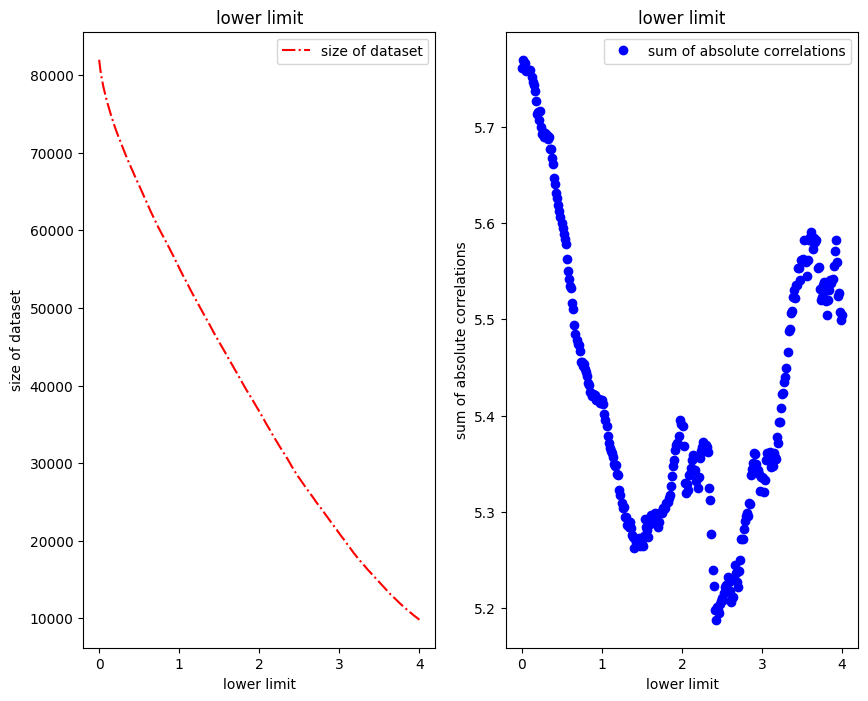

[81988, 80797, 79881, 79151, 78453, 77857, 77318, 76764, 76285, 75800, 75333, 74866, 74438, 74036, 73597, 73178, 72797, 72426, 72071, 71717, 71355, 70990, 70648, 70309, 69973, 69651, 69294, 68970, 68648, 68335, 68017, 67725, 67397, 67083, 66768, 66484, 66198, 65884, 65572, 65271, 64947, 64639, 64290, 63989, 63675, 63366, 63082, 62779, 62469, 62177, 61877, 61602, 61323, 61021, 60740, 60446, 60187, 59913, 59660, 59397, 59156, 58900, 58656, 58386, 58135, 57866, 57580, 57292, 57043, 56767, 56464, 56201, 55912, 55646, 55345, 55078, 54798, 54518, 54243, 53995, 53743, 53459, 53193, 52953, 52674, 52389, 52130, 51877, 51652, 51387, 51136, 50853, 50610, 50337, 50102, 49841, 49612, 49375, 49112, 48868, 48598, 48346, 48114, 47865, 47598, 47351, 47095, 46821, 46581, 46341, 46099, 45872, 45621, 45397, 45143, 44898, 44656, 44413, 44167, 43908, 43663, 43430, 43206, 42977, 42709, 42468, 42232, 41994, 41745, 41531, 41275, 41027, 40777, 40524, 40267, 40026, 39779, 39534, 39314, 39099, 38875, 38643, 38425

In [ ]:
sum_correlations = []
size_dataset = []
lowerlimits = np.linspace(0.001, 4, 300)
for limit in lowerlimits:
  dflimit = df.copy()[df["band_gap"] > limit]
  sum_correlations.append(np.sum(np.abs(np.array(dflimit.corr(numeric_only=True))[0])))
  size_dataset.append(len(dflimit))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(lowerlimits, size_dataset, '-.r')
plt.xlabel("lower limit")
plt.ylabel("size of dataset")
plt.title("lower limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(lowerlimits, sum_correlations, 'ob')
plt.xlabel("lower limit")
plt.ylabel("sum of absolute correlations")
plt.title("lower limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)


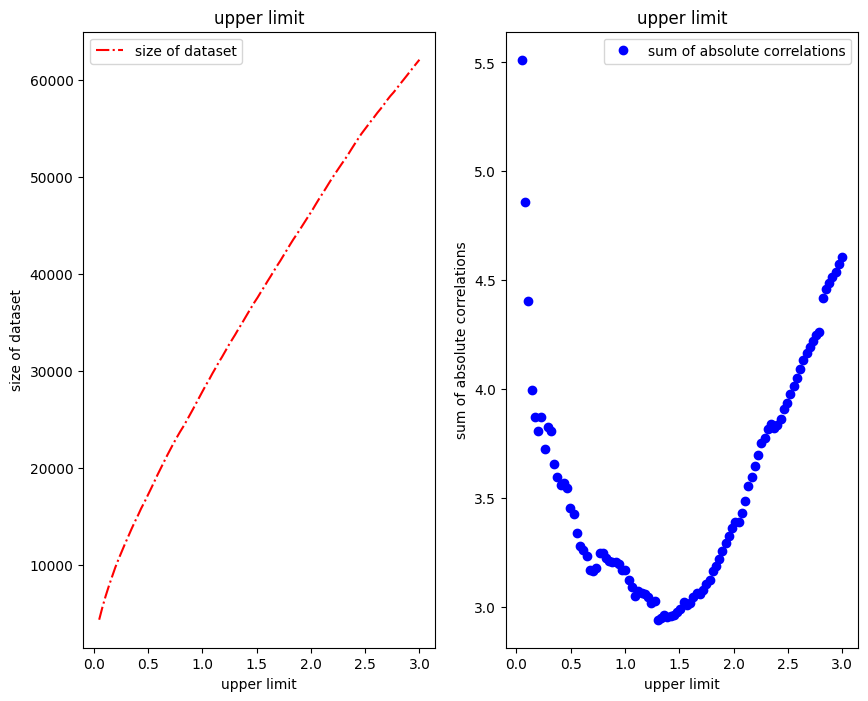

[4330, 5615, 6766, 7812, 8779, 9735, 10580, 11376, 12167, 12918, 13683, 14409, 15089, 15817, 16454, 17142, 17825, 18529, 19243, 19914, 20587, 21255, 21890, 22526, 23122, 23702, 24238, 24822, 25431, 26034, 26663, 27283, 27906, 28522, 29089, 29711, 30291, 30884, 31431, 32018, 32614, 33158, 33693, 34271, 34810, 35382, 35950, 36510, 37055, 37562, 38114, 38645, 39204, 39731, 40282, 40823, 41335, 41890, 42441, 42994, 43528, 44024, 44527, 45052, 45577, 46094, 46620, 47184, 47731, 48244, 48773, 49316, 49849, 50350, 50846, 51336, 51807, 52319, 52855, 53380, 53891, 54395, 54840, 55282, 55727, 56146, 56593, 56997, 57431, 57894, 58319, 58692, 59112, 59546, 59963, 60381, 60810, 61234, 61654, 62065]
[np.float64(5.512451272252581), np.float64(4.857939051767603), np.float64(4.402704316112893), np.float64(3.99782558558673), np.float64(3.8697474242295336), np.float64(3.8059388908903027), np.float64(3.8736617025866598), np.float64(3.726693230015059), np.float64(3.8246438956785576), np.float64(3.807249545

In [ ]:
sum_correlations = []
size_dataset = []
upperlimit = np.linspace(0.05, 4, 100)
for limit in upperlimit:
  dflimit = df.copy()[df["band_gap"] < limit]
  sum_correlations.append(np.sum(np.abs(np.array(dflimit.corr(numeric_only=True))[0])))
  size_dataset.append(len(dflimit))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(upperlimit, size_dataset, '-.r')
plt.xlabel("upper limit")
plt.ylabel("size of dataset")
plt.title("upper limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(upperlimit, sum_correlations, 'ob')
plt.xlabel("upper limit")
plt.ylabel("sum of absolute correlations")
plt.title("upper limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)


# Correlation from subset bandgap larger than .5


In [ ]:
# BandGaps larger then .1

df2 = df.copy()[df["band_gap"] > .5]
len(df2)

65786

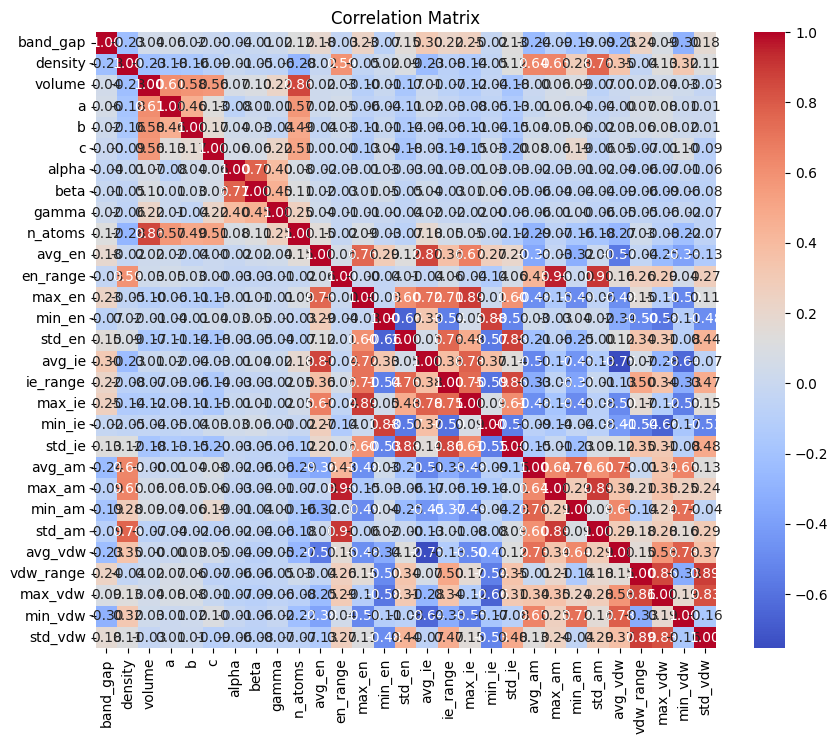

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Correlation from subset bandgap larger than 1

In [ ]:
# Correlation from subset bandgap larger than 1
df3 = df.copy()[df["band_gap"] > 1]
len(df3)

55163

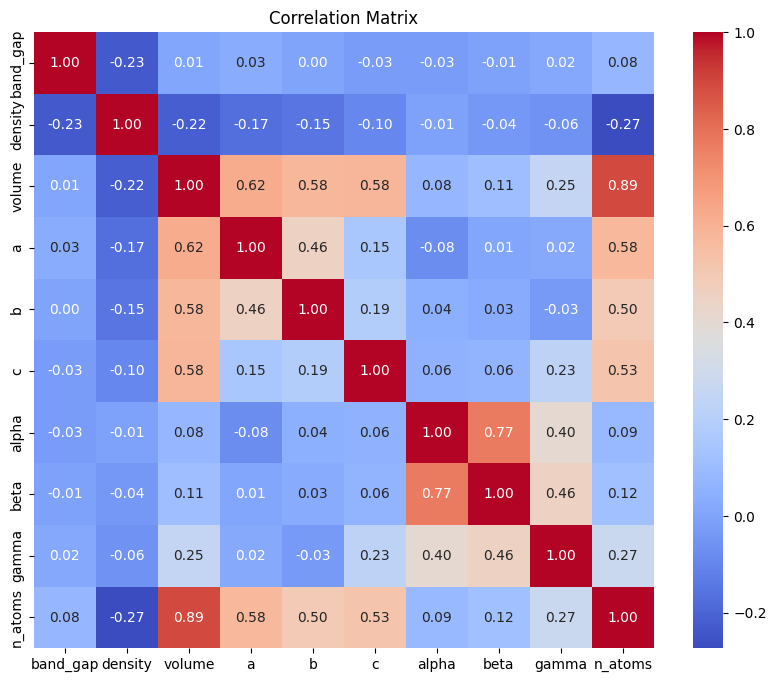

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Correlation from subset bandgap larger than 5

In [ ]:
# Correlation from subset bandgap larger than 5
df4 = df.copy()[df["band_gap"] > 5]
len(df4)

3892

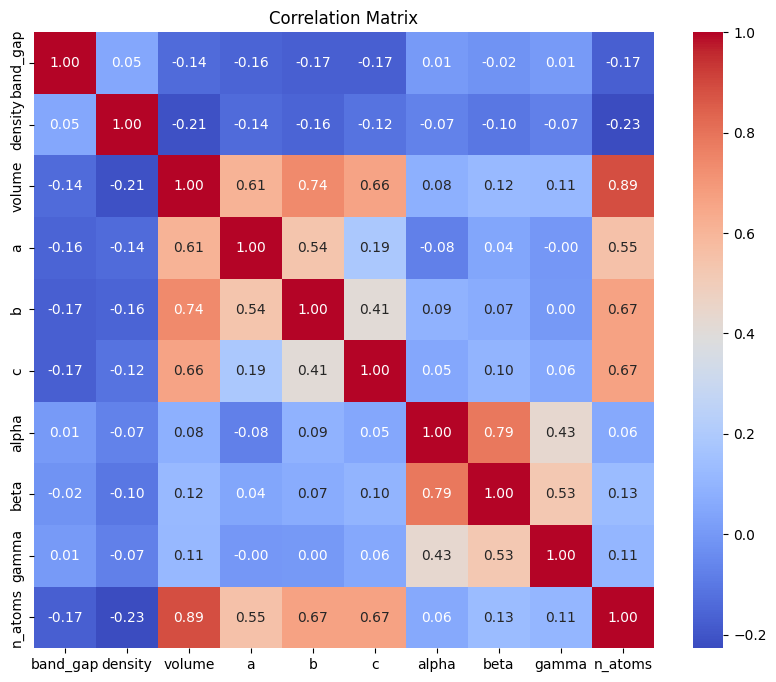

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Correlation from subset bandgap smaller than 2

In [ ]:
# Correlation from subset bandgap smaller than 2
df5 = df.copy()[df["band_gap"] < 2]
len(df5)

46320

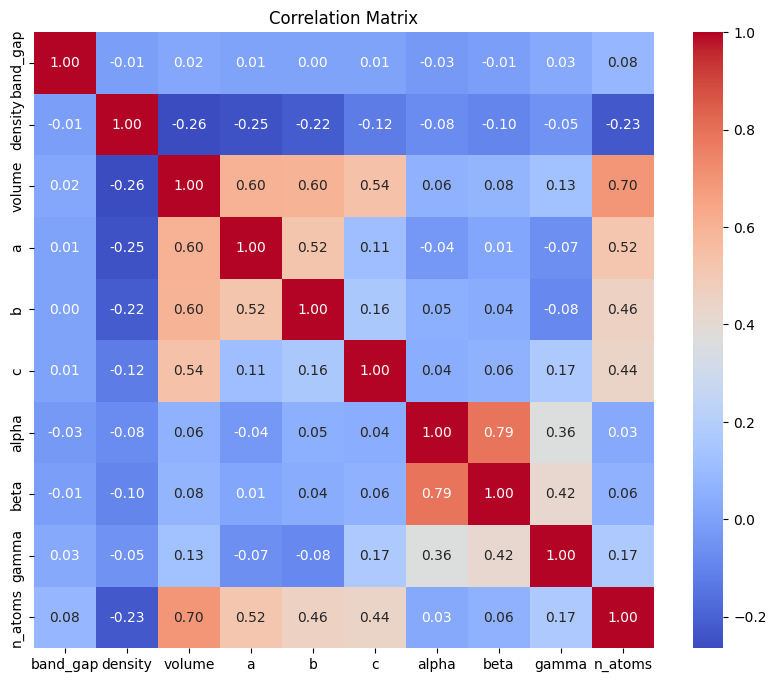

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df5.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

We see that there is more correlation between bandgao and other parameters when taking a smaller subset, filtering on bandgaps. Interesting to look at spacegroups how these influence correlations.